In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('college_student_placement_dataset.csv')

In [3]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
df.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [5]:
df.drop('College_ID',axis=1,inplace=True)

In [6]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


In [7]:
df.isnull().sum()

IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [8]:
df['Placement'].value_counts()

Placement
No     8341
Yes    1659
Name: count, dtype: int64

In [9]:
df.drop('Prev_Sem_Result',axis=1,inplace=True)

### DATA VISUALIZATION

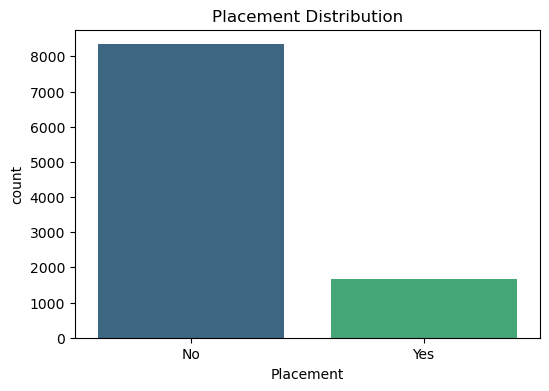

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Placement', data=df, palette='viridis')
plt.title('Placement Distribution')
plt.show()

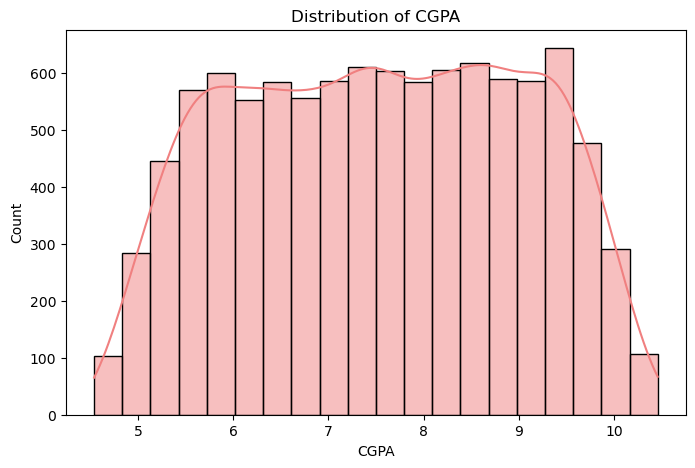

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['CGPA'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of CGPA')
plt.show()

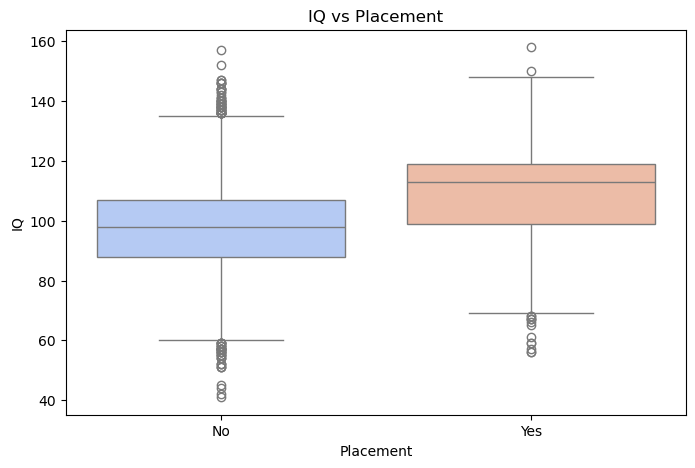

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Placement', y='IQ', data=df, palette='coolwarm')
plt.title('IQ vs Placement')
plt.show()

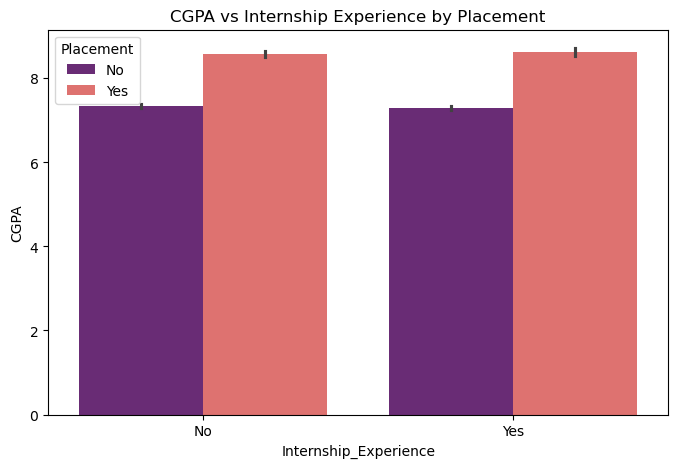

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='Internship_Experience', y='CGPA', hue='Placement', data=df, palette='magma')
plt.title('CGPA vs Internship Experience by Placement')
plt.show()

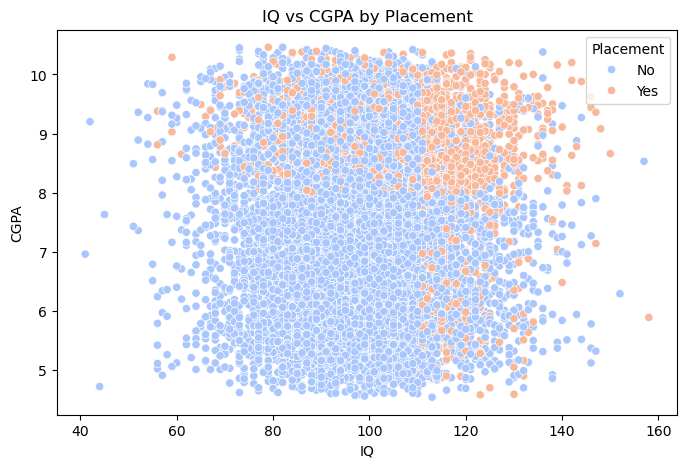

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='IQ', y='CGPA', hue='Placement', data=df, palette='coolwarm')
plt.title('IQ vs CGPA by Placement')
plt.show()

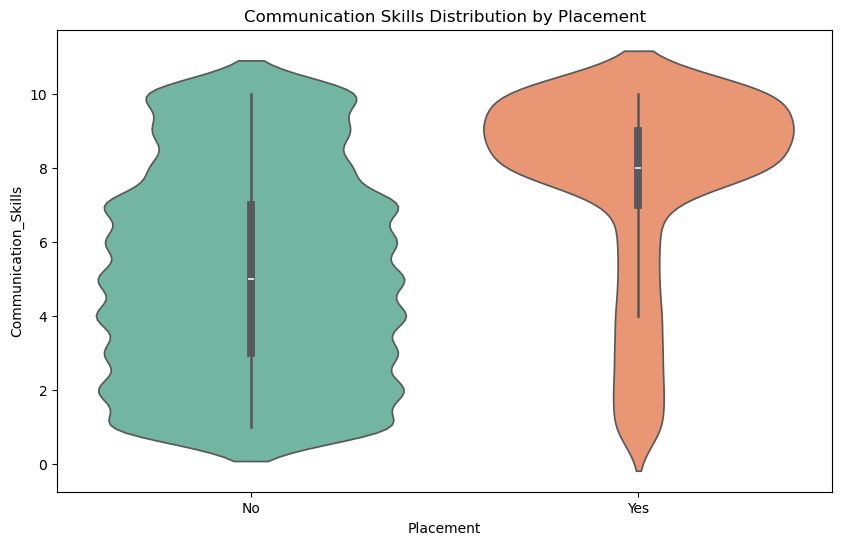

In [15]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Placement', y='Communication_Skills', data=df, palette='Set2')
plt.title('Communication Skills Distribution by Placement')
plt.show()

<Figure size 800x600 with 0 Axes>

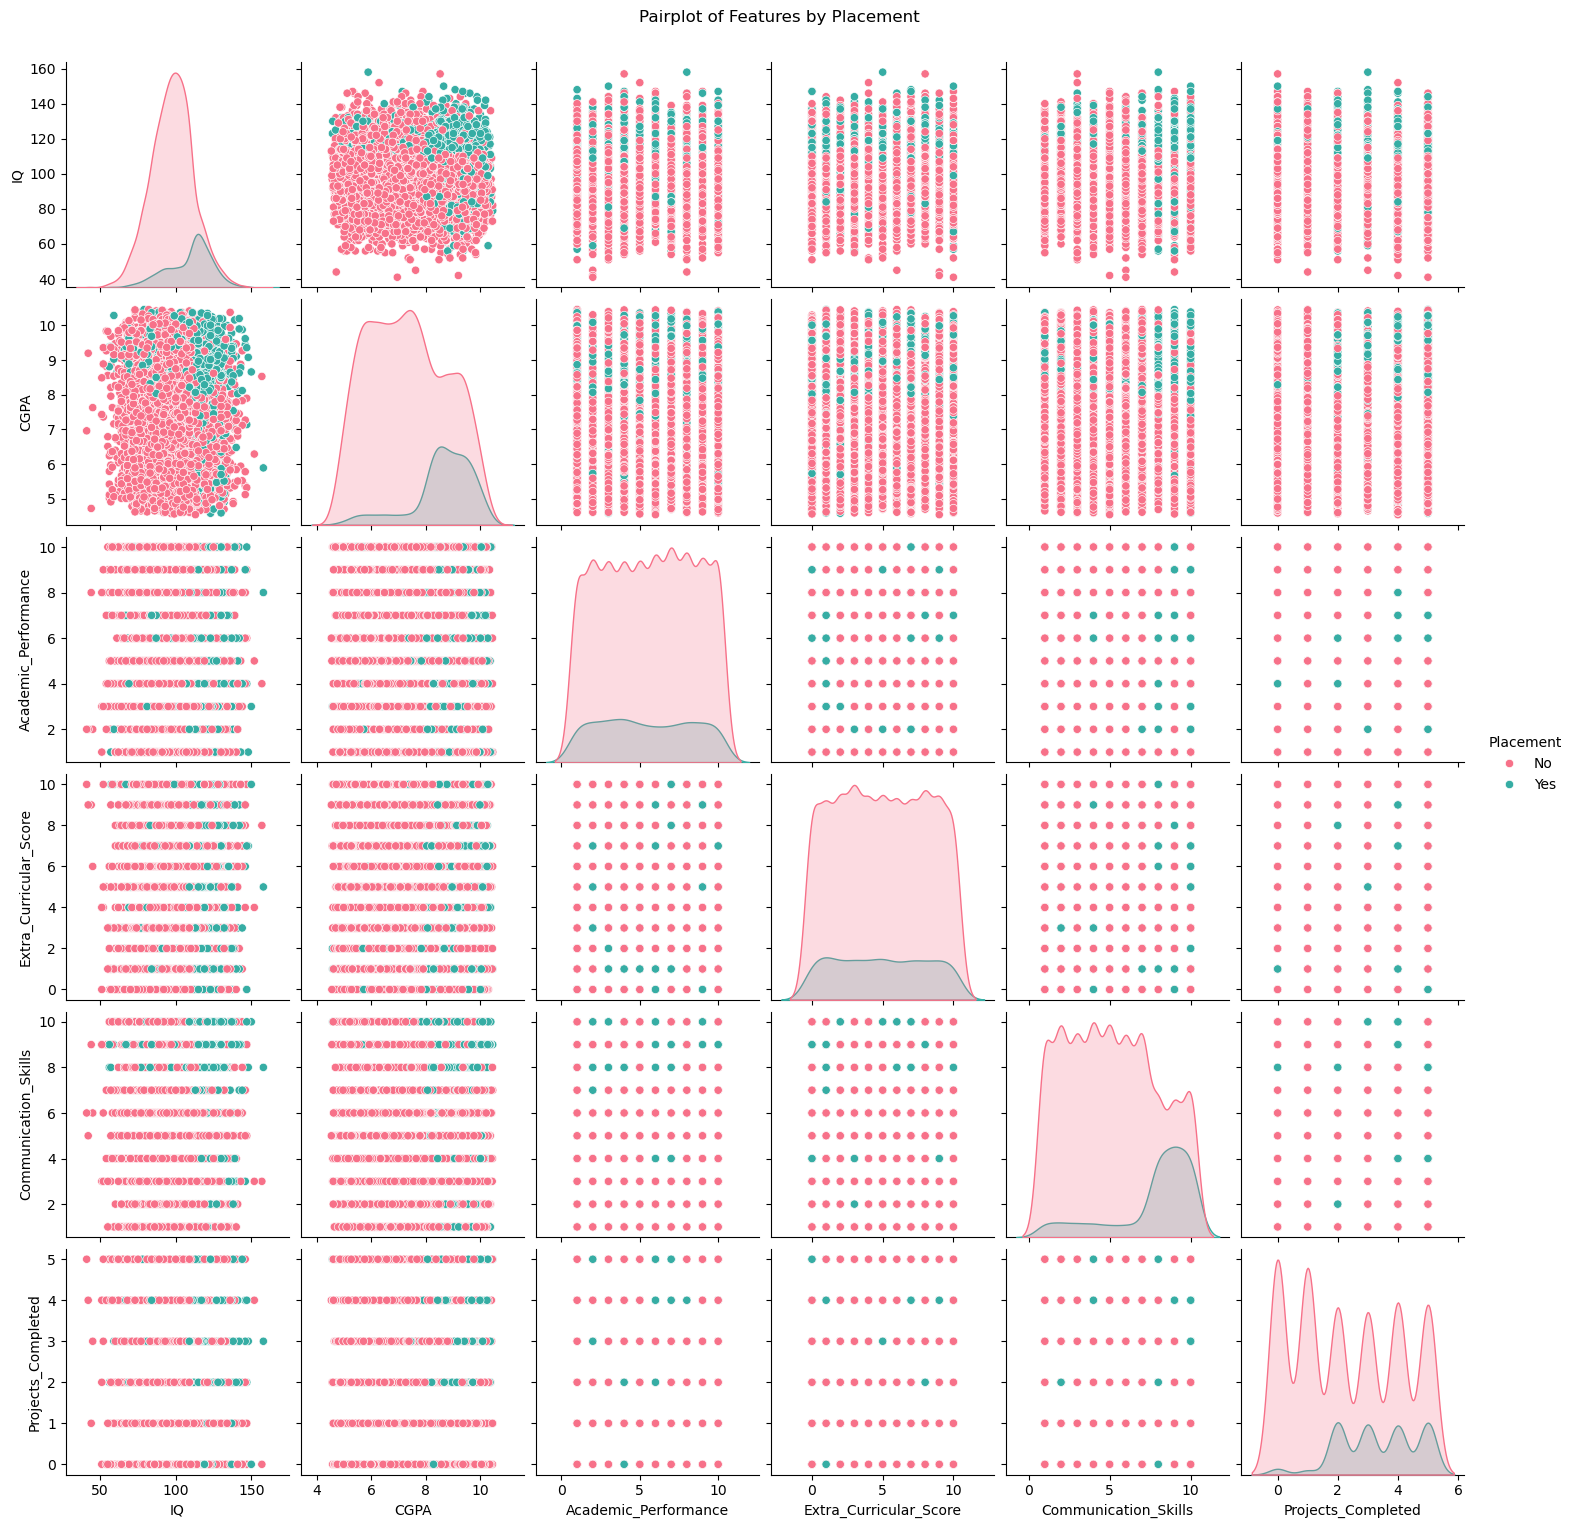

In [16]:
plt.figure(figsize=(8,6))
sns.pairplot(df, hue='Placement', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Features by Placement', y=1.02)
plt.show()

### TRAINING

In [17]:
X=df[['IQ','CGPA','Academic_Performance','Internship_Experience','Extra_Curricular_Score','Communication_Skills','Projects_Completed']]
y=df['Placement']

In [18]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Feature Scaling

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()
X_train['Internship_Experience']=le.fit_transform(X_train['Internship_Experience'])
X_test['Internship_Experience']=le.transform(X_test['Internship_Experience'])

In [21]:
X_train.head()

,IQ,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
4901,84,9.28,5,1,1,5,1
4375,109,8.76,6,1,10,9,2
6698,83,9.33,6,1,7,9,1
9805,80,7.76,1,1,5,7,2
1101,56,5.79,2,0,0,10,1


In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
gnb=GaussianNB()

In [24]:
gnb.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred=gnb.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[2069  226]
 [  27  178]]
0.8988
              precision    recall  f1-score   support

          No       0.99      0.90      0.94      2295
         Yes       0.44      0.87      0.58       205

    accuracy                           0.90      2500
   macro avg       0.71      0.88      0.76      2500
weighted avg       0.94      0.90      0.91      2500



In [27]:
new_data = np.array([[106, 9.36, 7, 0, 6, 6, 1],[146,9,5,1,8,6,2]])
prediction = gnb.predict(new_data)
print("Predicted class:", prediction)

Predicted class: ['No' 'Yes']


In [28]:
gnb 

GaussianNB()

In [30]:
import pickle
pickle.dump(gnb,open('gnb.pkl','wb'))